# Detection of gravitational waves using topological data analysis and convolutional neural network
José Abraham Martínez Licona | A01368551 \\
Cecilia Paláu Dávila | A01721673 \\
Jesús Marco Muñoz Hernández | A01721819
                    \\
Juan Pablo Ramírez Sobrepera | A01252523
                    \\
Sabrina Carsellé Aldaco | A01368666
                    \\
Natalia García Quintanilla | A01285165
                    \\
Laura de la Garza von Rossum | A00835349

## Desarrollo de Datos Sínteticos

In [ ]:
from generate_datasets import make_gravitational_waves
from pathlib import Path
import random
import numpy as np

In [ ]:
np.random.seed(26) #Para siempre tener los mismos datos generados
DATA_DIR = Path(".")
R_min = 0.075
R_max = 0.65
n_signals = 1500

noisy_signals, gw_signals, labels, rcoef = make_gravitational_waves(
    path_to_data=DATA_DIR, n_signals=n_signals, r_min=R_min, r_max=R_max, n_snr_values=5
)

print(f"Number of noisy signals: {len(noisy_signals)}")
print(f"Number of timesteps per series: {len(noisy_signals[0])}")

Number of noisy signals: 1500
Number of timesteps per series: 8692


In [ ]:
pip install giotto-tda

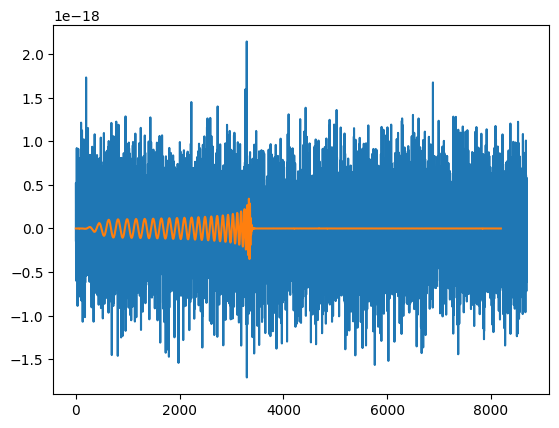

In [ ]:
import matplotlib.pyplot as plt
plt.plot(noisy_signals[1])
plt.plot(gw_signals[1])

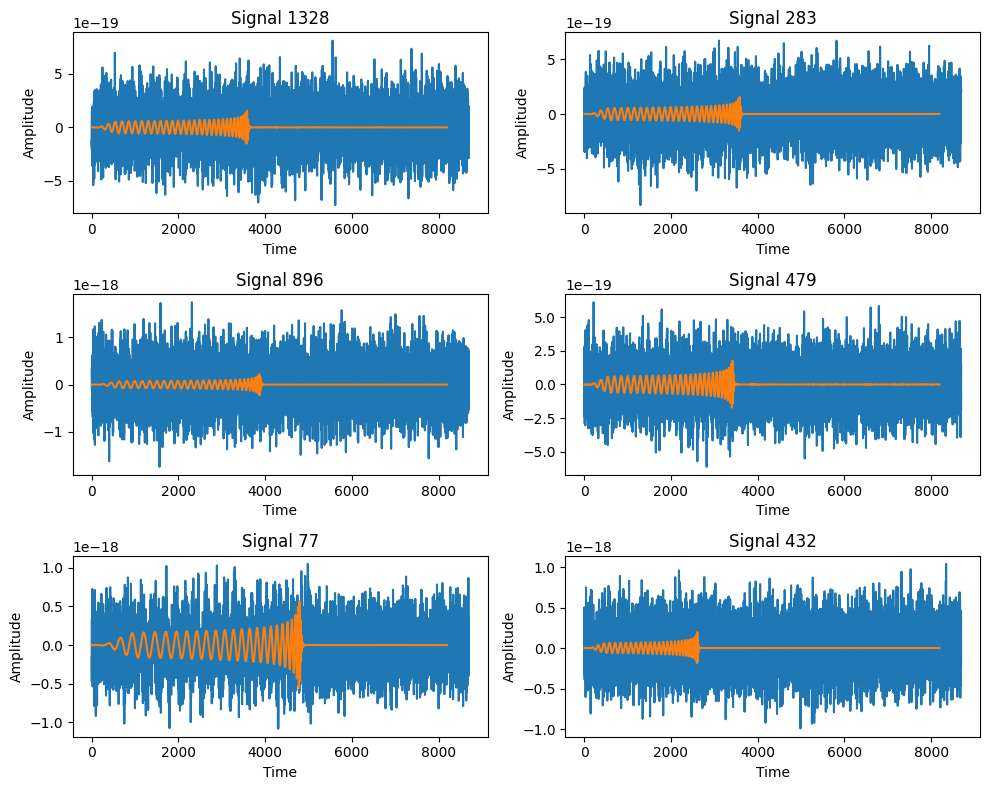

In [ ]:

valid_indices = [i for i in range(1500) if labels[i] == 1]
random_indices = random.sample(valid_indices, 6)
random_signals = [noisy_signals[i] for i in random_indices]
random_signals_gw = [gw_signals[i] for i in random_indices]


# Plot the selected signals
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

for i, ax in enumerate(axs.flatten()):
    ax.plot(random_signals[i])
    ax.plot(random_signals_gw[i])
    ax.set_title(f'Signal {random_indices[i]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [ ]:
np.unique(labels, return_counts=True)


(array([0., 1.]), array([771, 729]))

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# get the index corresponding to the first pure noise time series
background_idx = np.argmin(labels)
# get the index corresponding to the first noise + gravitational wave time series
signal_idx = np.argmax(labels)

ts_noise = noisy_signals[background_idx]
ts_background = noisy_signals[signal_idx]
ts_signal = gw_signals[signal_idx]

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_noise))), y=ts_noise, mode="lines", name="noise"),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=list(range(len(ts_background))),
        y=ts_background,
        mode="lines",
        name="background",
    ),
    row=1,
    col=2,
)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_signal))), y=ts_signal, mode="lines", name="signal"),
    row=1,
    col=2,
)
fig.show()

In [ ]:
valid_indices

[3,
 4,
 6,
 8,
 10,
 11,
 14,
 15,
 16,
 19,
 25,
 28,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 44,
 49,
 50,
 52,
 53,
 54,
 57,
 58,
 59,
 66,
 69,
 70,
 71,
 74,
 76,
 77,
 79,
 80,
 82,
 86,
 87,
 90,
 94,
 100,
 103,
 106,
 107,
 109,
 110,
 111,
 118,
 121,
 124,
 129,
 132,
 133,
 136,
 138,
 139,
 140,
 141,
 142,
 145,
 146,
 149,
 150,
 151,
 155,
 156,
 157,
 158,
 160,
 161,
 164,
 165,
 166,
 167,
 174,
 175,
 176,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 191,
 192,
 193,
 194,
 196,
 201,
 203,
 205,
 208,
 209,
 210,
 211,
 212,
 214,
 216,
 217,
 218,
 220,
 223,
 224,
 226,
 228,
 232,
 233,
 236,
 237,
 239,
 240,
 241,
 243,
 245,
 246,
 257,
 258,
 261,
 262,
 263,
 264,
 265,
 268,
 269,
 272,
 274,
 275,
 279,
 282,
 283,
 288,
 290,
 297,
 300,
 301,
 305,
 306,
 307,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 321,
 322,
 324,
 328,
 329,
 331,
 332,
 333,
 335,
 336,
 338,
 341,
 343,
 346,
 348,
 354,
 357,
 359,
 360,
 361,
 364,
 365,
 366,
 368,
 369,
 370,
 3

## Sliding Window Embedding y Reducción de Dimensionalidad

In [ ]:
from scipy.ndimage import uniform_filter1d
from gtda.time_series import SingleTakensEmbedding
from sklearn.decomposition import PCA

max_embedding_dimension_periodic = 200
max_embedding_time_delay_periodic = 10
stride = 5

embedder_periodic = SingleTakensEmbedding(
parameters_type="fixed",
n_jobs=2,
time_delay=max_embedding_time_delay_periodic,
dimension=max_embedding_dimension_periodic,
stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(noisy_signals[10])


print("Shape of embedded time series: {y_periodic_embedded.shape}")

from gtda.plotting import plot_point_cloud
pca = PCA(n_components=3)  # You can choose the number of components
signals_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(signals_pca)

Shape of embedded time series: {y_periodic_embedded.shape}


In [ ]:
rcoef

[0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.36250000000000004,
 0.50625,
 0.65,
 0.075,
 0.21875,
 0.3625000000

In [ ]:
max_embedding_dimension_periodic = 200
max_embedding_time_delay_periodic = 10
stride = 5

embedder_periodic = SingleTakensEmbedding(
parameters_type="fixed",
n_jobs=2,
time_delay=max_embedding_time_delay_periodic,
dimension=max_embedding_dimension_periodic,
stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(noisy_signals[57])


print("Shape of embedded time series: {y_periodic_embedded.shape}")

from gtda.plotting import plot_point_cloud
pca = PCA(n_components=3)  # You can choose the number of components
signals_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(signals_pca)

Shape of embedded time series: {y_periodic_embedded.shape}


In [ ]:
max_embedding_dimension_periodic = 200
max_embedding_time_delay_periodic = 10
stride = 5

embedder_periodic = SingleTakensEmbedding(
parameters_type="fixed",
n_jobs=2,
time_delay=max_embedding_time_delay_periodic,
dimension=max_embedding_dimension_periodic,
stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(noisy_signals[49])


print("Shape of embedded time series: {y_periodic_embedded.shape}")

from gtda.plotting import plot_point_cloud
pca = PCA(n_components=3)  # You can choose the number of components
signals_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(signals_pca)

Shape of embedded time series: {y_periodic_embedded.shape}


In [ ]:
max_embedding_dimension_periodic = 200
max_embedding_time_delay_periodic = 10
stride = 5

embedder_periodic = SingleTakensEmbedding(
parameters_type="fixed",
n_jobs=2,
time_delay=max_embedding_time_delay_periodic,
dimension=max_embedding_dimension_periodic,
stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(gw_signals[0])


print("Shape of embedded time series: {y_periodic_embedded.shape}")

from gtda.plotting import plot_point_cloud
pca = PCA(n_components=3)  # You can choose the number of components
signals_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(signals_pca)

Shape of embedded time series: {y_periodic_embedded.shape}



## Homología Persistente

In [ ]:
pip install gudhi

In [ ]:
max_embedding_dimension_periodic = 200
max_embedding_time_delay_periodic = 10
stride = 5

embedder_periodic = SingleTakensEmbedding(
parameters_type="fixed",
n_jobs=2,
time_delay=max_embedding_time_delay_periodic,
dimension=max_embedding_dimension_periodic,
stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(noisy_signals[49])


print("Shape of embedded time series: {y_periodic_embedded.shape}")

from gtda.plotting import plot_point_cloud
pca = PCA(n_components=3)  # You can choose the number of components
signals_pca = pca.fit_transform(y_periodic_embedded)


Shape of embedded time series: {y_periodic_embedded.shape}


In [ ]:
pip install ripser persim

In [ ]:
def get_sorted_persistences(dgm):
    persistences = [death - birth for birth, death in dgm if death < np.inf]
    return sorted(persistences, reverse=True)

# H0 persistences
persistences_H0 = get_sorted_persistences(persistence_diagrams[0])
# H1 persistences
persistences_H1 = get_sorted_persistences(persistence_diagrams[1])

# Form persistence vectors Π0 and Π1
Pi_0 = persistences_H0
Pi_1 = persistences_H1

print("Persistences in H0 (sorted):", Pi_0)
print("Persistences in H1 (sorted):", Pi_1)

Persistences in H0 (sorted): [2.6539381680364394e-19, 2.578744348428072e-19, 2.577321080786598e-19, 2.416987111691796e-19, 2.321384419926273e-19, 2.255572637921847e-19, 2.2492728820754314e-19, 2.2340917913896105e-19, 2.2082664371838807e-19, 2.1965271933281047e-19, 2.1514565774425337e-19, 2.137349787577266e-19, 2.1278078714705548e-19, 2.106415429866285e-19, 2.087921093086277e-19, 2.0875526099727789e-19, 2.082590301779285e-19, 2.0671421868519743e-19, 2.0610615046209146e-19, 2.0574149305892629e-19, 2.0488042389065273e-19, 2.0399473317445864e-19, 2.0375320936029023e-19, 2.003269755643073e-19, 2.0021608166343692e-19, 1.9915223692281422e-19, 1.9851707853464714e-19, 1.9815198169178155e-19, 1.9803029566885675e-19, 1.9627367424052383e-19, 1.9621884767554805e-19, 1.9578269084818532e-19, 1.9373419098589482e-19, 1.9329110652090196e-19, 1.9251599951284856e-19, 1.9071657148781602e-19, 1.9036744957053036e-19, 1.9003519438292254e-19, 1.8954485722543759e-19, 1.8823351746059961e-19, 1.8668526799844763e-

In [ ]:
def takens_embedding(signal):
  max_embedding_dimension_periodic = 100
  max_embedding_time_delay_periodic = 10
  stride = 5

  embedder_periodic = SingleTakensEmbedding(
  parameters_type="fixed",
  n_jobs=2,
  time_delay=max_embedding_time_delay_periodic,
  dimension=max_embedding_dimension_periodic,
  stride=stride,
  )

  y_periodic_embedded = embedder_periodic.fit_transform(signal)
  return y_periodic_embedded

# Función para realizar PCA y reducir a 3 dimensiones
def apply_pca(embedding):
    pca = PCA(n_components=3)
    return pca.fit_transform(embedding)

# Función para obtener las persistencias ordenadas
def get_sorted_persistences(dgm):
    persistences = [death - birth for birth, death in dgm if death < np.inf]
    return sorted(persistences, reverse=True)

all_persistences_H0 = []
all_persistences_H1 = []

for signal in noisy_signals:
    # Generar ventanas deslizantes usando Takens Embedding
    sliding_windows = takens_embedding(signal)

    # Aplicar PCA para reducir a 3 dimensiones
    sliding_windows_pca = apply_pca(sliding_windows)

    # Calcular el diagrama de persistencia
    persistence_diagram = ripser(sliding_windows_pca)['dgms']

    # Obtener y ordenar las persistencias para H0 y H1
    persistences_H0 = get_sorted_persistences(persistence_diagram[0])
    persistences_H1 = get_sorted_persistences(persistence_diagram[1])

    # Almacenar los vectores de persistencias
    all_persistences_H0.append(persistences_H0)
    all_persistences_H1.append(persistences_H1)

# Concatenar los vectores Pi_0 y Pi_1 de todas las señales
Pi_0_all = np.concatenate(all_persistences_H0)
Pi_1_all = np.concatenate(all_persistences_H1)

# Ejemplo: imprimir las primeras 10 persistencias de H0 y H1 concatenadas
print("Primeras 10 persistencias en H0:", Pi_0_all[:10])
print("Primeras 10 persistencias en H1:", Pi_1_all[:10])

Primeras 10 persistencias en H0: [2.07693451e-18 1.55758357e-18 1.50636269e-18 1.50624709e-18
 1.48304126e-18 1.47647955e-18 1.46622716e-18 1.46373228e-18
 1.44537828e-18 1.39812776e-18]
Primeras 10 persistencias en H1: [5.91653031e-19 5.86069148e-19 5.24661224e-19 5.15589224e-19
 5.00541258e-19 4.84648792e-19 4.81948409e-19 4.77965689e-19
 4.67277171e-19 4.48816620e-19]


## Datos de Entrenamiento

In [ ]:
import pandas as pd
df_datos = pd.DataFrame(all_persistences_H0)
df_datos["H1"] = all_persistences_H1
df_datos["Señal"] = noisy_signals

In [ ]:
df_datos.head()

,0,1,2,3,4,5,6,7,8,9,...,1532,1533,1534,1535,1536,1537,1538,1539,H1,Señal
0,2.076935e-18,1.557584e-18,1.506363e-18,1.506247e-18,1.483041e-18,1.476480e-18,1.466227e-18,1.463732e-18,1.445378e-18,1.398128e-18,...,7.026041e-20,6.810053e-20,6.467862e-20,6.173646e-20,5.777276e-20,5.476834e-20,5.286294e-20,4.309814e-20,"[5.916530306450116e-19, 5.860691479199724e-19,...","[1.7363294083480593e-18, 9.68586550190525e-19,..."
1,6.794475e-19,6.397327e-19,5.916627e-19,5.407335e-19,5.303998e-19,5.291605e-19,5.094795e-19,5.044257e-19,4.738347e-19,4.476091e-19,...,2.489966e-20,2.487174e-20,2.482881e-20,2.303295e-20,2.197382e-20,1.499624e-20,1.448839e-20,6.342428e-21,"[1.74415232683354e-19, 1.4920713616034777e-19,...","[-1.363537701017411e-19, 5.224332473371555e-19..."
2,3.834634e-19,3.665164e-19,3.455356e-19,3.372335e-19,3.257603e-19,3.226141e-19,3.091109e-19,3.082433e-19,2.895003e-19,2.804890e-19,...,1.256984e-20,1.240231e-20,1.198933e-20,1.164554e-20,8.783020e-21,6.681058e-21,6.127535e-21,5.495828e-21,"[1.1413429044718726e-19, 1.1310058610013447e-1...","[4.40940001744841e-19, -5.480810137898396e-19,..."
3,1.922765e-19,1.919708e-19,1.912371e-19,1.788409e-19,1.775238e-19,1.766623e-19,1.728490e-19,1.682015e-19,1.645299e-19,1.590228e-19,...,1.152902e-20,1.136198e-20,1.045715e-20,9.519442e-21,8.929523e-21,8.785375e-21,7.720303e-21,6.999129e-21,"[8.625114352197282e-20, 7.245169002835986e-20,...","[-1.3721475750136408e-21, 3.0089537857473404e-..."
4,2.029053e-19,2.002210e-19,1.824637e-19,1.808602e-19,1.778487e-19,1.776366e-19,1.755861e-19,1.647620e-19,1.624621e-19,1.614943e-19,...,6.472287e-21,5.877453e-21,5.399025e-21,5.387052e-21,5.240650e-21,4.663425e-21,2.884350e-21,2.711880e-21,"[9.31678210089881e-20, 5.555580223392829e-20, ...","[1.0859073069779487e-19, 1.7930860845773972e-1..."


In [ ]:
df_datos["H0"]=all_persistences_H0

In [ ]:
df_datos.head()

,0,1,2,3,4,5,6,7,8,9,...,1533,1534,1535,1536,1537,1538,1539,H1,Señal,H0
0,2.076935e-18,1.557584e-18,1.506363e-18,1.506247e-18,1.483041e-18,1.476480e-18,1.466227e-18,1.463732e-18,1.445378e-18,1.398128e-18,...,6.810053e-20,6.467862e-20,6.173646e-20,5.777276e-20,5.476834e-20,5.286294e-20,4.309814e-20,"[5.916530306450116e-19, 5.860691479199724e-19,...","[1.7363294083480593e-18, 9.68586550190525e-19,...","[2.076934506039742e-18, 1.5575835749791888e-18..."
1,6.794475e-19,6.397327e-19,5.916627e-19,5.407335e-19,5.303998e-19,5.291605e-19,5.094795e-19,5.044257e-19,4.738347e-19,4.476091e-19,...,2.487174e-20,2.482881e-20,2.303295e-20,2.197382e-20,1.499624e-20,1.448839e-20,6.342428e-21,"[1.74415232683354e-19, 1.4920713616034777e-19,...","[-1.363537701017411e-19, 5.224332473371555e-19...","[6.794474993195523e-19, 6.397326969545032e-19,..."
2,3.834634e-19,3.665164e-19,3.455356e-19,3.372335e-19,3.257603e-19,3.226141e-19,3.091109e-19,3.082433e-19,2.895003e-19,2.804890e-19,...,1.240231e-20,1.198933e-20,1.164554e-20,8.783020e-21,6.681058e-21,6.127535e-21,5.495828e-21,"[1.1413429044718726e-19, 1.1310058610013447e-1...","[4.40940001744841e-19, -5.480810137898396e-19,...","[3.834634319397493e-19, 3.665164140437043e-19,..."
3,1.922765e-19,1.919708e-19,1.912371e-19,1.788409e-19,1.775238e-19,1.766623e-19,1.728490e-19,1.682015e-19,1.645299e-19,1.590228e-19,...,1.136198e-20,1.045715e-20,9.519442e-21,8.929523e-21,8.785375e-21,7.720303e-21,6.999129e-21,"[8.625114352197282e-20, 7.245169002835986e-20,...","[-1.3721475750136408e-21, 3.0089537857473404e-...","[1.9227654365021153e-19, 1.9197082286569076e-1..."
4,2.029053e-19,2.002210e-19,1.824637e-19,1.808602e-19,1.778487e-19,1.776366e-19,1.755861e-19,1.647620e-19,1.624621e-19,1.614943e-19,...,5.877453e-21,5.399025e-21,5.387052e-21,5.240650e-21,4.663425e-21,2.884350e-21,2.711880e-21,"[9.31678210089881e-20, 5.555580223392829e-20, ...","[1.0859073069779487e-19, 1.7930860845773972e-1...","[2.029053363077263e-19, 2.0022098012362688e-19..."


In [ ]:
df2_datos = df_datos.iloc[:, 1540:]
df2_datos.head()

,H1,Señal,H0
0,"[5.916530306450116e-19, 5.860691479199724e-19,...","[1.7363294083480593e-18, 9.68586550190525e-19,...","[2.076934506039742e-18, 1.5575835749791888e-18..."
1,"[1.74415232683354e-19, 1.4920713616034777e-19,...","[-1.363537701017411e-19, 5.224332473371555e-19...","[6.794474993195523e-19, 6.397326969545032e-19,..."
2,"[1.1413429044718726e-19, 1.1310058610013447e-1...","[4.40940001744841e-19, -5.480810137898396e-19,...","[3.834634319397493e-19, 3.665164140437043e-19,..."
3,"[8.625114352197282e-20, 7.245169002835986e-20,...","[-1.3721475750136408e-21, 3.0089537857473404e-...","[1.9227654365021153e-19, 1.9197082286569076e-1..."
4,"[9.31678210089881e-20, 5.555580223392829e-20, ...","[1.0859073069779487e-19, 1.7930860845773972e-1...","[2.029053363077263e-19, 2.0022098012362688e-19..."


In [ ]:
pip install openpyxl


In [ ]:
df2_datos["Label"] = labels
df2_datos.head()

,H1,Señal,H0,Label
0,"[5.916530306450116e-19, 5.860691479199724e-19,...","[1.7363294083480593e-18, 9.68586550190525e-19,...","[2.076934506039742e-18, 1.5575835749791888e-18...",0.0
1,"[1.74415232683354e-19, 1.4920713616034777e-19,...","[-1.363537701017411e-19, 5.224332473371555e-19...","[6.794474993195523e-19, 6.397326969545032e-19,...",0.0
2,"[1.1413429044718726e-19, 1.1310058610013447e-1...","[4.40940001744841e-19, -5.480810137898396e-19,...","[3.834634319397493e-19, 3.665164140437043e-19,...",0.0
3,"[8.625114352197282e-20, 7.245169002835986e-20,...","[-1.3721475750136408e-21, 3.0089537857473404e-...","[1.9227654365021153e-19, 1.9197082286569076e-1...",1.0
4,"[9.31678210089881e-20, 5.555580223392829e-20, ...","[1.0859073069779487e-19, 1.7930860845773972e-1...","[2.029053363077263e-19, 2.0022098012362688e-19...",1.0


In [ ]:
import ast

max_length_H0 = df2_datos['H0'].apply(len).max()
max_length_H1 = df2_datos['H1'].apply(len).max()

print(f"Maximum length of lists in 'H0 persistences': {max_length_H0}")
print(f"Maximum length of lists in 'H1 persistences': {max_length_H1}")
max=0
# Compare the maximum lengths
if max_length_H0 > max_length_H1:
    max = max_length_H0
elif max_length_H0 < max_length_H1:
    max = max_length_H1
else:
    max = max_length_H0

max

Maximum length of lists in 'H0 persistences': 1540
Maximum length of lists in 'H1 persistences': 870


1540

In [ ]:
df2_datos['H0_padded'] = df2_datos['H0'].apply(lambda x: x + [0]*(max - len(x)))
df2_datos['H1_padded'] = df2_datos['H1'].apply(lambda x: x + [0]*(max - len(x)))

# Step 3: Concatenate the H0 and H1 lists into a new column named PI
df2_datos['PI'] = df2_datos.apply(lambda row: row['H0_padded'] + row['H1_padded'], axis=1)


In [ ]:
df2_datos["H0_padded"][50]

[1.8004034777698957e-18,
 1.612086919130614e-18,
 1.5069586739248715e-18,
 1.4462165267984182e-18,
 1.3913984404239165e-18,
 1.348840514895946e-18,
 1.318769501099923e-18,
 1.2643890966670384e-18,
 1.2146200173539838e-18,
 1.198143199937387e-18,
 1.166637337971314e-18,
 1.1265339675135182e-18,
 1.123451789153569e-18,
 1.1122756484997885e-18,
 1.1115818507610097e-18,
 1.1024234104163991e-18,
 1.100678369516642e-18,
 1.0647448165267258e-18,
 1.051801818084532e-18,
 1.0361993305754037e-18,
 1.0217729904997492e-18,
 1.0168237620996913e-18,
 1.0087973184233596e-18,
 1.0022024141946274e-18,
 9.796721856577909e-19,
 9.790117853362439e-19,
 9.692408177480378e-19,
 9.656467179864949e-19,
 9.60573412494554e-19,
 9.605295719220887e-19,
 9.520421818494118e-19,
 9.372330639452984e-19,
 9.371869486261485e-19,
 9.357261476643799e-19,
 9.3554230677324e-19,
 9.16960004504966e-19,
 9.123119732454539e-19,
 9.083921711177182e-19,
 9.083878284195023e-19,
 9.033809041717189e-19,
 9.028178009697234e-19,
 9.0

In [ ]:
df2_datos

,H1,Señal,H0,Label,H0_padded,H1_padded,PI
0,"[5.916530306450116e-19, 5.860691479199724e-19,...","[1.7363294083480593e-18, 9.68586550190525e-19,...","[2.076934506039742e-18, 1.5575835749791888e-18...",0.0,"[2.076934506039742e-18, 1.5575835749791888e-18...","[5.916530306450116e-19, 5.860691479199724e-19,...","[2.076934506039742e-18, 1.5575835749791888e-18..."
1,"[1.74415232683354e-19, 1.4920713616034777e-19,...","[-1.363537701017411e-19, 5.224332473371555e-19...","[6.794474993195523e-19, 6.397326969545032e-19,...",0.0,"[6.794474993195523e-19, 6.397326969545032e-19,...","[1.74415232683354e-19, 1.4920713616034777e-19,...","[6.794474993195523e-19, 6.397326969545032e-19,..."
2,"[1.1413429044718726e-19, 1.1310058610013447e-1...","[4.40940001744841e-19, -5.480810137898396e-19,...","[3.834634319397493e-19, 3.665164140437043e-19,...",0.0,"[3.834634319397493e-19, 3.665164140437043e-19,...","[1.1413429044718726e-19, 1.1310058610013447e-1...","[3.834634319397493e-19, 3.665164140437043e-19,..."
3,"[8.625114352197282e-20, 7.245169002835986e-20,...","[-1.3721475750136408e-21, 3.0089537857473404e-...","[1.9227654365021153e-19, 1.9197082286569076e-1...",1.0,"[1.9227654365021153e-19, 1.9197082286569076e-1...","[8.625114352197282e-20, 7.245169002835986e-20,...","[1.9227654365021153e-19, 1.9197082286569076e-1..."
4,"[9.31678210089881e-20, 5.555580223392829e-20, ...","[1.0859073069779487e-19, 1.7930860845773972e-1...","[2.029053363077263e-19, 2.0022098012362688e-19...",1.0,"[2.029053363077263e-19, 2.0022098012362688e-19...","[9.31678210089881e-20, 5.555580223392829e-20, ...","[2.029053363077263e-19, 2.0022098012362688e-19..."
...,...,...,...,...,...,...,...
1495,"[6.16856965415561e-19, 4.975075726248654e-19, ...","[1.7339457951895646e-19, -1.0426631736221955e-...","[1.7267729261216771e-18, 1.4997525866210392e-1...",1.0,"[1.7267729261216771e-18, 1.4997525866210392e-1...","[6.16856965415561e-19, 4.975075726248654e-19, ...","[1.7267729261216771e-18, 1.4997525866210392e-1..."
1496,"[2.262986502655795e-19, 1.8578747976579496e-19...","[9.224202078513521e-20, 2.6862317701070644e-19...","[6.422214249237339e-19, 6.040330809815748e-19,...",1.0,"[6.422214249237339e-19, 6.040330809815748e-19,...","[2.262986502655795e-19, 1.8578747976579496e-19...","[6.422214249237339e-19, 6.040330809815748e-19,..."
1497,"[1.1035667937427976e-19, 9.927006163476249e-20...","[5.245236800189869e-20, -4.0829061743610325e-1...","[3.9980981331350425e-19, 3.391796716118694e-19...",1.0,"[3.9980981331350425e-19, 3.391796716118694e-19...","[1.1035667937427976e-19, 9.927006163476249e-20...","[3.9980981331350425e-19, 3.391796716118694e-19..."
1498,"[1.1284577569737692e-19, 1.116336200578629e-19...","[2.920332049245046e-19, -1.366494566511063e-19...","[3.8578403544947854e-19, 3.7613923875408095e-1...",1.0,"[3.8578403544947854e-19, 3.7613923875408095e-1...","[1.1284577569737692e-19, 1.116336200578629e-19...","[3.8578403544947854e-19, 3.7613923875408095e-1..."


In [ ]:
df2_datos['X'] = [pi + noise.tolist() for pi, noise in zip(df2_datos['PI'], noisy_signals)]
df2_datos.head()

,H1,Señal,H0,Label,H0_padded,H1_padded,PI,X
0,"[5.916530306450116e-19, 5.860691479199724e-19,...","[1.7363294083480593e-18, 9.68586550190525e-19,...","[2.076934506039742e-18, 1.5575835749791888e-18...",0.0,"[2.076934506039742e-18, 1.5575835749791888e-18...","[5.916530306450116e-19, 5.860691479199724e-19,...","[2.076934506039742e-18, 1.5575835749791888e-18...","[2.076934506039742e-18, 1.5575835749791888e-18..."
1,"[1.74415232683354e-19, 1.4920713616034777e-19,...","[-1.363537701017411e-19, 5.224332473371555e-19...","[6.794474993195523e-19, 6.397326969545032e-19,...",0.0,"[6.794474993195523e-19, 6.397326969545032e-19,...","[1.74415232683354e-19, 1.4920713616034777e-19,...","[6.794474993195523e-19, 6.397326969545032e-19,...","[6.794474993195523e-19, 6.397326969545032e-19,..."
2,"[1.1413429044718726e-19, 1.1310058610013447e-1...","[4.40940001744841e-19, -5.480810137898396e-19,...","[3.834634319397493e-19, 3.665164140437043e-19,...",0.0,"[3.834634319397493e-19, 3.665164140437043e-19,...","[1.1413429044718726e-19, 1.1310058610013447e-1...","[3.834634319397493e-19, 3.665164140437043e-19,...","[3.834634319397493e-19, 3.665164140437043e-19,..."
3,"[8.625114352197282e-20, 7.245169002835986e-20,...","[-1.3721475750136408e-21, 3.0089537857473404e-...","[1.9227654365021153e-19, 1.9197082286569076e-1...",1.0,"[1.9227654365021153e-19, 1.9197082286569076e-1...","[8.625114352197282e-20, 7.245169002835986e-20,...","[1.9227654365021153e-19, 1.9197082286569076e-1...","[1.9227654365021153e-19, 1.9197082286569076e-1..."
4,"[9.31678210089881e-20, 5.555580223392829e-20, ...","[1.0859073069779487e-19, 1.7930860845773972e-1...","[2.029053363077263e-19, 2.0022098012362688e-19...",1.0,"[2.029053363077263e-19, 2.0022098012362688e-19...","[9.31678210089881e-20, 5.555580223392829e-20, ...","[2.029053363077263e-19, 2.0022098012362688e-19...","[2.029053363077263e-19, 2.0022098012362688e-19..."


In [ ]:
len(df2_datos['X'][0])

11772

In [ ]:
# Step 5: Create a new dataframe with each item in the list as a separate column
datos = pd.DataFrame(df2_datos['X'].to_list())

# Step 6: Add the label column to the new dataframe
datos['label'] = df2_datos["Label"]
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,11763,11764,11765,11766,11767,11768,11769,11770,11771,label
0,2.076935e-18,1.557584e-18,1.506363e-18,1.506247e-18,1.483041e-18,1.476480e-18,1.466227e-18,1.463732e-18,1.445378e-18,1.398128e-18,...,1.321046e-19,6.288081e-19,1.326751e-18,-1.715774e-19,-8.339379e-19,2.482017e-19,-1.519131e-18,4.832589e-19,-4.530652e-19,0.0
1,6.794475e-19,6.397327e-19,5.916627e-19,5.407335e-19,5.303998e-19,5.291605e-19,5.094795e-19,5.044257e-19,4.738347e-19,4.476091e-19,...,-7.173307e-19,5.834670e-19,-1.229060e-19,5.601369e-19,2.087518e-20,-1.000779e-19,-1.358007e-19,-3.273967e-19,-1.480729e-19,0.0
2,3.834634e-19,3.665164e-19,3.455356e-19,3.372335e-19,3.257603e-19,3.226141e-19,3.091109e-19,3.082433e-19,2.895003e-19,2.804890e-19,...,-1.946578e-20,1.271233e-19,-5.154422e-19,-4.162623e-19,1.868344e-19,-2.486029e-19,-3.385805e-20,1.086968e-19,4.842134e-20,0.0
3,1.922765e-19,1.919708e-19,1.912371e-19,1.788409e-19,1.775238e-19,1.766623e-19,1.728490e-19,1.682015e-19,1.645299e-19,1.590228e-19,...,-8.835093e-20,9.686225e-20,1.096947e-19,-1.496800e-19,1.146558e-19,-2.215179e-19,2.114332e-19,4.452506e-20,3.650183e-19,1.0
4,2.029053e-19,2.002210e-19,1.824637e-19,1.808602e-19,1.778487e-19,1.776366e-19,1.755861e-19,1.647620e-19,1.624621e-19,1.614943e-19,...,3.217566e-19,1.154813e-20,5.927246e-20,1.326269e-19,-5.665602e-21,-2.618501e-20,-8.071893e-20,1.832385e-19,1.395877e-20,1.0


In [ ]:
datos.to_excel("datosentrenar.xlsx",index=False)